In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import plotly.express as px
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter
%matplotlib inline

pd.options.mode.chained_assignment = None 

In [2]:
#read in csv
avocado = pd.read_csv("Project Resources/Avocado.csv")
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


In [3]:
#find data types
avocado.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [4]:
#change date from object to date
avocado["Date"] = pd.to_datetime(avocado.Date)

In [5]:
avocado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [6]:
#to pull month, day, year
avocado.Date.dt.month

0         1
1         1
2         1
3         1
4         2
         ..
27318    11
27319    11
27320    12
27321    12
27322    12
Name: Date, Length: 27323, dtype: int64

In [7]:
#pandas API reference pandas.pydata.org

In [8]:
#timestamp
ts = pd.to_datetime('2/2/2019')
ts

Timestamp('2019-02-02 00:00:00')

In [9]:
#locates dates by timestamp
avocado.loc[avocado.Date >= ts, :]

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
209,2019-02-03,0.98,213344.02,4467.13,195884.03,132.44,12860.42,10403.62,2456.80,0.00,conventional,2019,Albany
210,2019-02-10,1.02,124204.74,5071.69,105911.87,168.00,13053.18,9722.42,3330.76,0.00,conventional,2019,Albany
211,2019-02-17,1.24,106200.32,4972.37,88494.87,232.00,12501.08,9376.44,3124.64,0.00,conventional,2019,Albany
212,2019-02-24,1.08,130748.31,4014.41,115060.05,212.07,11461.78,7725.65,3732.80,3.33,conventional,2019,Albany
213,2019-03-03,1.30,109572.01,4208.57,91894.92,245.00,13223.52,7581.66,5615.19,26.67,conventional,2019,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,2019-11-03,1.72,21292.34,1158.06,412.61,1429.26,18292.41,17574.10,718.31,0.00,organic,2019,West Tex/New Mexico
27268,2019-11-10,1.69,20175.00,871.00,383.00,1507.00,17414.00,17101.00,312.00,0.00,organic,2019,West Tex/New Mexico
27269,2019-11-17,1.68,17278.00,1088.00,340.00,1230.00,14620.00,14618.00,2.00,0.00,organic,2019,West Tex/New Mexico
27270,2019-11-24,1.62,20587.00,1065.00,444.00,1635.00,17443.00,16791.00,652.00,0.00,organic,2019,West Tex/New Mexico


In [10]:
#math
avocado.Date.max() - avocado.Date.min()

Timedelta('1792 days 00:00:00')

In [11]:
#avocado["MonthName"] = avocado.Date.dt.strftime("%b")
avocado["Month"] = avocado.Date.dt.month
avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,1
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,1
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,1
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,2


In [12]:
avocado.Month.value_counts().sort_index()

1     2484
2     2161
3     2377
4     2376
5     2376
6     2266
7     2484
8     2268
9     2376
10    2376
11    2268
12    1511
Name: Month, dtype: int64

In [73]:
#to add column to divide volume by 1 mil to avoid scientific notation
avocado["Millions"]= avocado["Total Volume"]/1000000
avocado


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Millions
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,0.040873
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,1,0.041195
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,1,0.044511
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,1,0.045148
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,2,0.070874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27318,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.0,organic,2015,WestTexNewMexico,11,0.006249
27319,2015-11-29,2.08,4638.10,1395.02,2238.04,61.71,943.33,943.33,0.00,0.0,organic,2015,WestTexNewMexico,11,0.004638
27320,2015-12-13,1.80,7836.65,2194.49,2981.01,25.97,2635.18,2598.45,36.73,0.0,organic,2015,WestTexNewMexico,12,0.007837
27321,2015-12-20,1.92,6255.19,1512.45,2407.32,11.78,2323.64,2213.72,109.92,0.0,organic,2015,WestTexNewMexico,12,0.006255


In [78]:
#calculate the sum of all the avoc sold for each month for all 5 years
avopltvol = (avocado.groupby(["year", "Month"])["Millions"].agg(['sum']).round(decimals=0))
avopltvol

sum
year Month       
2015 1      318.0
     2      363.0
     3      419.0
     4      344.0
     5      484.0
     6      382.0
     7      357.0
     8      419.0
     9      329.0
     10     306.0
     11     369.0
     12     296.0
2016 1      475.0
     2      429.0
     3      391.0
     4      402.0
     5      561.0
     6      410.0
     7      467.0
     8      371.0
     9      362.0
     10     360.0
     11     260.0
     12     331.0
2017 1      533.0
     2      472.0
     3      359.0
     4      490.0
     5      426.0
     6      410.0
     7      475.0
     8      338.0
     9      285.0
     10     363.0
     11     325.0
     12     355.0
2018 1      534.0
     2      498.0
     3      455.0
     4      602.0
     5      552.0
     6      494.0
     7      599.0
     8      433.0
     9      501.0
     10     409.0
     11     356.0
     12      76.0
2019 1      503.0
     2      534.0
     3      634.0
     4      465.0
     5      467.0
     6      553.0
     7      390.0
     8      411.0
     9      534.0
     10     430.0
     11     410.0
     12      86.0

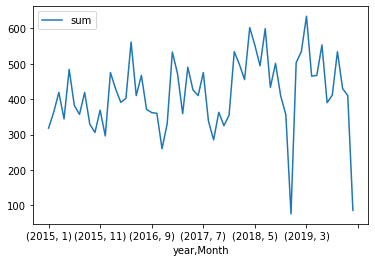

In [79]:
avopltvol.plot()

In [75]:
#calc the average price of an avoc for the month
month_price_avg = (avocado.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
month_price_avg

,mean
Month,
1,1.30
2,1.26
3,1.31
4,1.37
5,1.37
6,1.42
7,1.48
8,1.51
9,1.53


In [15]:
#merge the data together so it can be graphed together
mergestart= pd.merge(month_price_avg, avopltvol, how="outer", on="Month")

mergestart.head(12)

,mean,sum
Month,,
1,1.30,2364.0
2,1.26,2294.0
3,1.31,2258.0
4,1.37,2302.0
5,1.37,2489.0
6,1.42,2249.0
7,1.48,2287.0
8,1.51,1972.0
9,1.53,2011.0


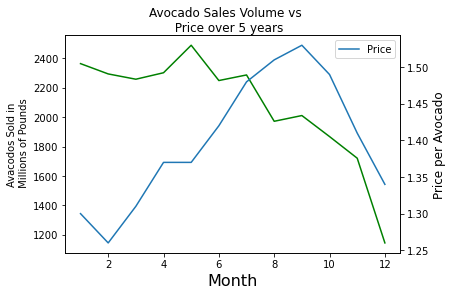

In [16]:
#overlay the average price of avoc and volume for all 5 years combined
fig, ax = plt.subplots()
ax.plot(mergestart.index.values, mergestart["sum"], color="green", label= "Volume")
ax2=ax.twinx()
ax2.plot(mergestart.index.values, mergestart["mean"], label= "Price")
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in\n Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
#fig.suptitle("Avocado Sales Volume vs\Price over 5 years")
#legend_one=ax.plot(mergestart.index.values, mergestart["sum"], color="green", label= "Volume")
#legend_two=ax2.plot(mergestart.index.values, mergestart["mean"], label= "Price")
fig.suptitle('Avocado Sales Volume vs \n Price over 5 years')
plt.legend()
plt.show
plt.savefig('totalsalesvsprice.png')

In [17]:
#experimenting how to group by year and months

#avo_2019 = avocado.loc[avocado["Year"] == "2019"]
#avo_2019.head

In [18]:
#broken
#month_price_avg.plot()

In [19]:
# from matplotlib.ticker import FuncFormatter
# import matplotlib.pyplot as plt
# import numpy as np

# x = np.arange(4)
# money = [1.5e5, 2.5e6, 5.5e6, 2.0e7]


# def millions(x, pos):
#     'The two args are the value and tick position'
#     return '$%1.1fM' % (x * 1e-6)


# formatter = FuncFormatter(millions)

# fig, ax = plt.subplots()
# ax.yaxis.set_major_formatter(formatter)
# plt.bar(x, money)
# plt.xticks(x, ('Bill', 'Fred', 'Mary', 'Sue'))
# plt.show()

In [20]:
#broken
#graph for sales per month 2015
#avocado.groupby("Year")["Total Volume"].sum().plot()

In [21]:
#avocado.groupby("Month")["Total Volume"].sum().plot()
#avocado.groupby(["Month", "year" == 2015])["Total Volume"].sum().plot()


In [22]:
#avocado.groupby(['Month'] == 2018, as_index=False).agg({"Total Volume": "sum"})

In [23]:
#avocado.groupby(["year", "Month"])

In [24]:
#avo_df= avocado.groupby(["year", "Month"]).groups
#avo_df.head()

In [25]:

#avo_df=avocado.loc[avocado["Year"] == "2019"]
#avo_df.head()

In [26]:
#avo_pivot=avocado.pivot_table(index= 'Month', values= 'Total Volume', aggfunc= 'sum')
#avo_pivot


In [27]:
# avo2019= []
# for length in avocado.Year:
#     if length ==2019:
#         avo2019.append(True)
#     else:
#         avo2019.append(False)
# avo2019pd = pd.Series(avo2019)
# avo2019pd.head()
# avocados2019 = avocado[avo2019pd]
# avocados2019

In [28]:
#get data for 2015
avoc2015_df= avocado.loc[avocado.year == 2015]
avoc2015_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Millions
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,0.040873
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,1,0.041195
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,1,0.044511
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,1,0.045148
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,2,0.070874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27318,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.0,organic,2015,WestTexNewMexico,11,0.006249
27319,2015-11-29,2.08,4638.10,1395.02,2238.04,61.71,943.33,943.33,0.00,0.0,organic,2015,WestTexNewMexico,11,0.004638
27320,2015-12-13,1.80,7836.65,2194.49,2981.01,25.97,2635.18,2598.45,36.73,0.0,organic,2015,WestTexNewMexico,12,0.007837
27321,2015-12-20,1.92,6255.19,1512.45,2407.32,11.78,2323.64,2213.72,109.92,0.0,organic,2015,WestTexNewMexico,12,0.006255


In [30]:
avoc2015_df["Millions"]= avoc2015_df["Total Volume"]/1000000
avoc2015_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Millions
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,0.040873
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany,1,0.041195
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany,1,0.044511
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany,1,0.045148
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany,2,0.070874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27318,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.0,organic,2015,WestTexNewMexico,11,0.006249
27319,2015-11-29,2.08,4638.10,1395.02,2238.04,61.71,943.33,943.33,0.00,0.0,organic,2015,WestTexNewMexico,11,0.004638
27320,2015-12-13,1.80,7836.65,2194.49,2981.01,25.97,2635.18,2598.45,36.73,0.0,organic,2015,WestTexNewMexico,12,0.007837
27321,2015-12-20,1.92,6255.19,1512.45,2407.32,11.78,2323.64,2213.72,109.92,0.0,organic,2015,WestTexNewMexico,12,0.006255


In [31]:
monthavoc2015_df = (avoc2015_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))
monthavoc2015_df

,sum
Month,
1,318.0
2,363.0
3,419.0
4,344.0
5,484.0
6,382.0
7,357.0
8,419.0
9,329.0


<function matplotlib.pyplot.show(*args, **kw)>

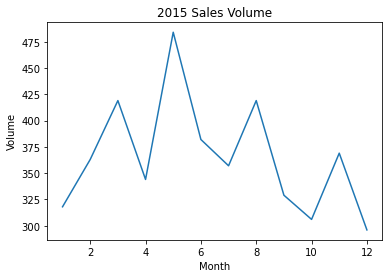

In [32]:
x_ax=monthavoc2015_df.index.values
y_ax=monthavoc2015_df["sum"]

plt.title("2015 Sales Volume")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.plot(x_ax, y_ax)
plt.show

In [33]:
month_price_avg2015 = (avoc2015_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
month_price_avg2015

,mean
Month,
1,1.37
2,1.33
3,1.36
4,1.38
5,1.34
6,1.40
7,1.41
8,1.44
9,1.45


In [34]:
merge2015= pd.merge(month_price_avg2015, monthavoc2015_df, how="outer", on="Month")
merge2015= merge2015.rename(columns={"mean": "mean15", "sum": "sum15"})
merge2015.head(12)

,mean15,sum15
Month,,
1,1.37,318.0
2,1.33,363.0
3,1.36,419.0
4,1.38,344.0
5,1.34,484.0
6,1.40,382.0
7,1.41,357.0
8,1.44,419.0
9,1.45,329.0


In [35]:
merge2015.iloc[:,[0]].max()

mean15    1.45
dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

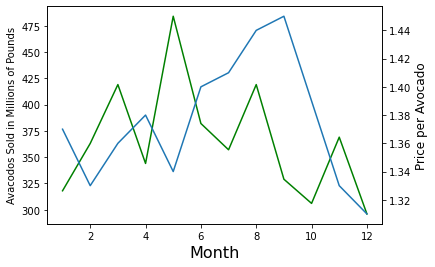

In [36]:
fig, ax = plt.subplots()
ax.plot(merge2015.index.values, merge2015["sum15"], color="green")
ax2=ax.twinx()
ax2.plot(merge2015.index.values, merge2015["mean15"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

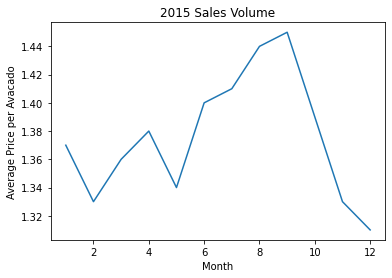

In [37]:
x_ax=month_price_avg2015.index.values
y_ax=month_price_avg2015["mean"]

plt.title("2015 Sales Volume")
plt.xlabel("Month")
plt.ylabel("Average Price per Avacado")
plt.plot(x_ax, y_ax)
plt.show

In [38]:
#2016
avoc2016_df= avocado.loc[avocado.year == 2016]
avoc2016_df["Millions"]= avoc2016_df["Total Volume"]/1000000
avoc2016_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Millions
52,2016-01-04,1.03,149038.15,939.71,139735.90,132.35,8230.19,8056.43,173.76,0.0,conventional,2016,Albany,1,0.149038
53,2016-01-10,1.28,79121.77,848.19,66696.97,109.08,11467.53,11293.65,173.88,0.0,conventional,2016,Albany,1,0.079122
54,2016-01-17,1.26,119972.41,1202.52,100613.46,51.22,18105.21,17980.53,124.68,0.0,conventional,2016,Albany,1,0.119972
55,2016-01-24,1.22,96089.13,545.37,70802.56,68.41,24672.79,23926.35,746.44,0.0,conventional,2016,Albany,1,0.096089
56,2016-01-31,1.16,102038.32,1386.24,79881.67,69.46,20700.95,19788.78,912.17,0.0,conventional,2016,Albany,1,0.102038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27118,2016-11-27,1.72,9783.93,1014.39,2423.56,0.00,6345.98,6307.59,38.39,0.0,organic,2016,West Tex/New Mexico,11,0.009784
27119,2016-12-04,1.82,9895.04,819.39,2435.34,19.99,6620.32,6533.87,86.45,0.0,organic,2016,West Tex/New Mexico,12,0.009895
27120,2016-12-11,1.54,13227.83,790.03,3777.96,60.01,8599.83,8510.92,88.91,0.0,organic,2016,West Tex/New Mexico,12,0.013228
27121,2016-12-18,1.34,11406.50,945.89,2571.83,31.47,7857.31,7819.17,38.14,0.0,organic,2016,West Tex/New Mexico,12,0.011406


In [39]:
monthavoc2016_df = (avoc2016_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))
monthavoc2016_df

,sum
Month,
1,475.0
2,429.0
3,391.0
4,402.0
5,561.0
6,410.0
7,467.0
8,371.0
9,362.0


In [40]:
month_price_avg2016 = (avoc2016_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
month_price_avg2016

,mean
Month,
1,1.24
2,1.24
3,1.22
4,1.21
5,1.20
6,1.28
7,1.40
8,1.41
9,1.43


In [41]:
merge2016= pd.merge(month_price_avg2016, monthavoc2016_df, how="outer", on="Month")
merge2016= merge2016.rename(columns={"mean": "mean16", "sum": "sum16"})
merge2016.head()

,mean16,sum16
Month,,
1,1.24,475.0
2,1.24,429.0
3,1.22,391.0
4,1.21,402.0
5,1.20,561.0


<function matplotlib.pyplot.show(*args, **kw)>

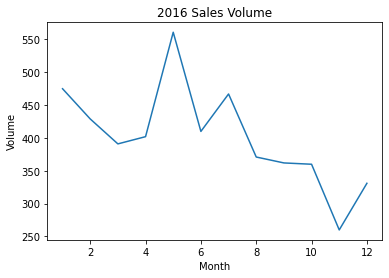

In [42]:
x_ax=monthavoc2016_df.index.values
y_ax=monthavoc2016_df["sum"]

plt.title("2016 Sales Volume")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.plot(x_ax, y_ax)
plt.show


<function matplotlib.pyplot.show(*args, **kw)>

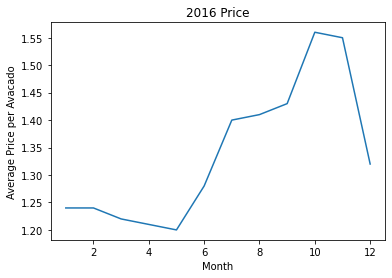

In [43]:
x_ax=month_price_avg2016.index.values
y_ax=month_price_avg2016["mean"]

plt.title("2016 Price")
plt.xlabel("Month")
plt.ylabel("Average Price per Avacado")
plt.plot(x_ax, y_ax)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

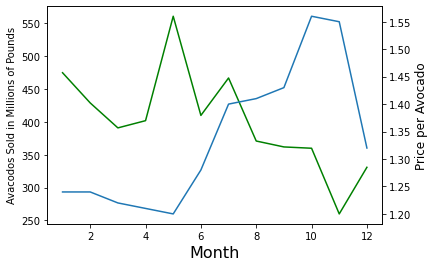

In [44]:
fig, ax = plt.subplots()
ax.plot(merge2016.index.values, merge2016["sum16"], color="green")
ax2=ax.twinx()
ax2.plot(merge2016.index.values, merge2016["mean16"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

In [45]:
#2017
avoc2017_df= avocado.loc[avocado.year == 2017]
avoc2017_df["Millions"]= avoc2017_df["Total Volume"]/1000000
avoc2017_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Millions
104,2017-01-02,1.47,129948.23,4845.77,117027.41,200.36,7874.69,7866.86,7.83,0.00,conventional,2017,Albany,1,0.129948
105,2017-01-08,1.55,91728.18,3355.47,75641.23,56.91,12674.57,12606.67,67.90,0.00,conventional,2017,Albany,1,0.091728
106,2017-01-15,1.55,88526.26,3327.65,71956.77,607.03,12634.81,12574.72,60.09,0.00,conventional,2017,Albany,1,0.088526
107,2017-01-22,1.59,128679.24,4119.94,111173.08,2191.71,11194.51,11060.19,125.50,8.82,conventional,2017,Albany,1,0.128679
108,2017-01-29,1.31,95424.59,3844.62,78315.15,484.56,12780.26,12393.84,382.06,4.36,conventional,2017,Albany,1,0.095425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27170,2017-11-26,1.91,11191.35,2030.64,2072.44,0.00,7088.27,7049.99,38.28,0.00,organic,2017,West Tex/New Mexico,11,0.011191
27171,2017-12-03,1.55,13729.33,1768.49,2732.92,0.00,9227.92,9002.58,225.34,0.00,organic,2017,West Tex/New Mexico,12,0.013729
27172,2017-12-10,1.65,14628.70,1220.08,2293.05,0.00,11115.57,10928.40,187.17,0.00,organic,2017,West Tex/New Mexico,12,0.014629
27173,2017-12-17,1.78,15409.21,1314.05,2079.36,0.00,12015.80,11964.20,51.60,0.00,organic,2017,West Tex/New Mexico,12,0.015409


In [46]:
monthavoc2017_df = (avoc2017_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))

monthavoc2017_df


,sum
Month,
1,533.0
2,472.0
3,359.0
4,490.0
5,426.0
6,410.0
7,475.0
8,338.0
9,285.0


<function matplotlib.pyplot.show(*args, **kw)>

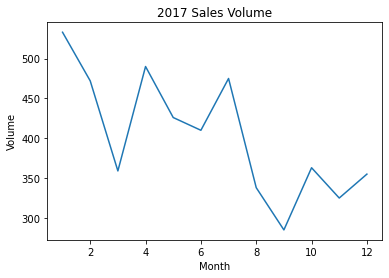

In [47]:
x_ax=monthavoc2017_df.index.values
y_ax=monthavoc2017_df["sum"]

plt.title("2017 Sales Volume")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.plot(x_ax, y_ax)
plt.show

In [48]:
month_price_avg2017 = (avoc2017_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
month_price_avg2017

,mean
Month,
1,1.28
2,1.21
3,1.40
4,1.50
5,1.53
6,1.55
7,1.56
8,1.70
9,1.84


In [49]:
merge2017= pd.merge(month_price_avg2017, monthavoc2017_df, how="outer", on="Month")
merge2017= merge2017.rename(columns={"mean": "mean17", "sum": "sum17"})
merge2017.head()

,mean17,sum17
Month,,
1,1.28,533.0
2,1.21,472.0
3,1.40,359.0
4,1.50,490.0
5,1.53,426.0


<function matplotlib.pyplot.show(*args, **kw)>

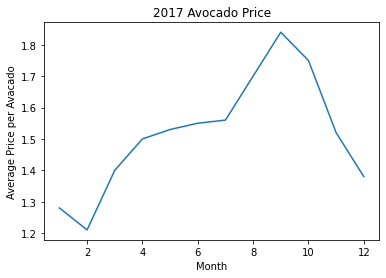

In [50]:
x_ax=month_price_avg2017.index.values
y_ax=month_price_avg2017["mean"]

plt.title("2017 Avocado Price")
plt.xlabel("Month")
plt.ylabel("Average Price per Avacado")
plt.plot(x_ax, y_ax)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

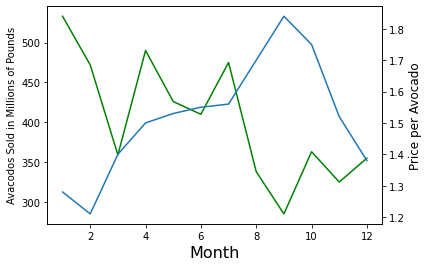

In [51]:
fig, ax = plt.subplots()
ax.plot(merge2017.index.values, merge2017["sum17"], color="green")
ax2=ax.twinx()
ax2.plot(merge2017.index.values, merge2017["mean17"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

In [52]:
#2018
avoc2018_df= avocado.loc[avocado.year == 2018]
avoc2018_df["Millions"]= avoc2018_df["Total Volume"]/1000000
avoc2018_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Millions
156,2018-01-01,1.47,113514.42,2622.70,101135.53,20.25,9735.94,5556.98,4178.96,0.00,conventional,2018,Albany,1,0.113514
157,2018-01-07,1.13,98540.22,2940.63,76192.61,42.63,19364.35,8633.09,10707.93,23.33,conventional,2018,Albany,1,0.098540
158,2018-01-14,1.42,95246.38,2897.41,76570.67,44.00,15734.30,10012.80,5721.50,0.00,conventional,2018,Albany,1,0.095246
159,2018-01-21,1.69,135196.35,3133.37,116520.88,88.78,15453.32,10023.79,5429.53,0.00,conventional,2018,Albany,1,0.135196
160,2018-01-28,1.57,93625.03,3101.17,74627.23,55.59,15841.04,11614.79,4159.58,66.67,conventional,2018,Albany,1,0.093625
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27219,2018-11-04,1.57,26405.33,3895.81,2292.30,0.00,20217.22,19870.76,346.46,0.00,organic,2018,West Tex/New Mexico,11,0.026405
27220,2018-11-11,1.31,39181.26,3782.36,14176.80,156.93,21065.17,20912.14,153.03,0.00,organic,2018,West Tex/New Mexico,11,0.039181
27221,2018-11-18,1.54,26316.49,3902.14,5072.04,59.32,17282.99,16786.74,496.25,0.00,organic,2018,West Tex/New Mexico,11,0.026316
27222,2018-11-25,1.60,21957.16,4906.97,1655.35,0.00,15394.84,14799.03,595.81,0.00,organic,2018,West Tex/New Mexico,11,0.021957


In [53]:
monthavoc2018_df = (avoc2018_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))
monthavoc2018_df

,sum
Month,
1,534.0
2,498.0
3,455.0
4,602.0
5,552.0
6,494.0
7,599.0
8,433.0
9,501.0


<function matplotlib.pyplot.show(*args, **kw)>

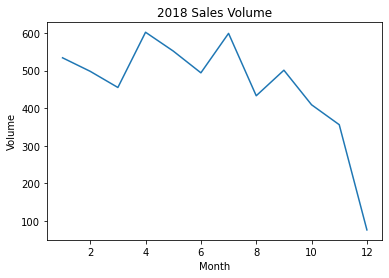

In [54]:
x_ax=monthavoc2018_df.index.values
y_ax=monthavoc2018_df["sum"]

plt.title("2018 Sales Volume")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.plot(x_ax, y_ax)
plt.show

In [55]:
month_price_avg2018 = (avoc2018_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
                      
month_price_avg2018

,mean
Month,
1,1.37
2,1.32
3,1.34
4,1.32
5,1.28
6,1.31
7,1.34
8,1.42
9,1.48


In [56]:
merge2018= pd.merge(month_price_avg2018, monthavoc2018_df, how="outer", on="Month")
merge2018= merge2018.rename(columns={"mean": "mean18", "sum": "sum18"})
merge2018.head()

,mean18,sum18
Month,,
1,1.37,534.0
2,1.32,498.0
3,1.34,455.0
4,1.32,602.0
5,1.28,552.0


<function matplotlib.pyplot.show(*args, **kw)>

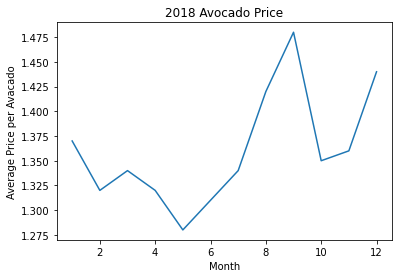

In [57]:
x_ax=month_price_avg2018.index.values
y_ax=month_price_avg2018["mean"]

plt.title("2018 Avocado Price")
plt.xlabel("Month")
plt.ylabel("Average Price per Avacado")
plt.plot(x_ax, y_ax)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

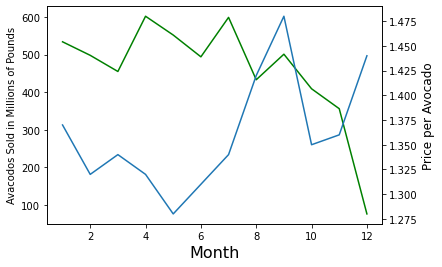

In [58]:
fig, ax = plt.subplots()
ax.plot(merge2018.index.values, merge2018["sum18"], color="green")
ax2=ax.twinx()
ax2.plot(merge2018.index.values, merge2018["mean18"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

In [59]:
#2019
avoc2019_df= avocado.loc[avocado.year == 2019]
avoc2019_df["Millions"]= avoc2019_df["Total Volume"]/1000000
avoc2019_df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Millions
205,2019-01-07,1.07,129222.29,3789.30,112635.18,158.00,12639.81,8877.95,3761.86,0.00,conventional,2019,Albany,1,0.129222
206,2019-01-13,1.09,133875.68,3134.59,119057.57,193.24,11490.28,8247.70,3222.58,20.00,conventional,2019,Albany,1,0.133876
207,2019-01-20,1.17,168796.32,4646.85,145017.45,190.22,18941.80,12096.60,6845.20,0.00,conventional,2019,Albany,1,0.168796
208,2019-01-27,1.25,89103.75,3594.66,72427.35,220.21,12861.53,9891.60,2966.60,3.33,conventional,2019,Albany,1,0.089104
209,2019-02-03,0.98,213344.02,4467.13,195884.03,132.44,12860.42,10403.62,2456.80,0.00,conventional,2019,Albany,2,0.213344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27267,2019-11-03,1.72,21292.34,1158.06,412.61,1429.26,18292.41,17574.10,718.31,0.00,organic,2019,West Tex/New Mexico,11,0.021292
27268,2019-11-10,1.69,20175.00,871.00,383.00,1507.00,17414.00,17101.00,312.00,0.00,organic,2019,West Tex/New Mexico,11,0.020175
27269,2019-11-17,1.68,17278.00,1088.00,340.00,1230.00,14620.00,14618.00,2.00,0.00,organic,2019,West Tex/New Mexico,11,0.017278
27270,2019-11-24,1.62,20587.00,1065.00,444.00,1635.00,17443.00,16791.00,652.00,0.00,organic,2019,West Tex/New Mexico,11,0.020587


In [60]:
monthavoc2019_df = (avoc2019_df.groupby("Month")["Millions"].agg(['sum']).round(decimals=0))
monthavoc2019_df

,sum
Month,
1,503.0
2,534.0
3,634.0
4,465.0
5,467.0
6,553.0
7,390.0
8,411.0
9,534.0


<function matplotlib.pyplot.show(*args, **kw)>

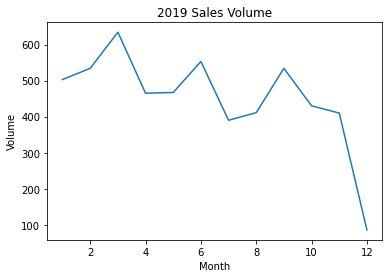

In [61]:
x_ax=monthavoc2019_df.index.values
y_ax=monthavoc2019_df["sum"]
tick_locations = [value for value in x_ax]
plt.title("2019 Sales Volume")
plt.xlabel("Month")
plt.ylabel("Volume")
plt.plot(x_ax, y_ax)

plt.show

In [62]:
month_price_avg2019 = (avoc2019_df.groupby(["Month"])["AveragePrice"].agg(['mean']).round(decimals=2))
                     
month_price_avg2019

,mean
Month,
1,1.27
2,1.19
3,1.22
4,1.42
5,1.53
6,1.52
7,1.73
8,1.61
9,1.46


In [63]:
merge2019= pd.merge(month_price_avg2019, monthavoc2019_df, how="outer", on="Month")
merge2019= merge2019.rename(columns={"mean": "mean19", "sum": "sum19"})
merge2019.head()

,mean19,sum19
Month,,
1,1.27,503.0
2,1.19,534.0
3,1.22,634.0
4,1.42,465.0
5,1.53,467.0


<function matplotlib.pyplot.show(*args, **kw)>

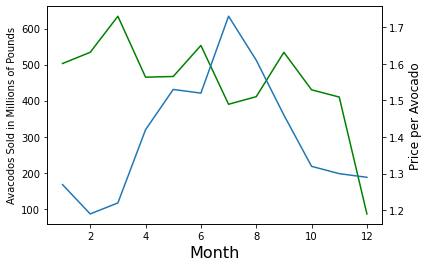

In [64]:
fig, ax = plt.subplots()
ax.plot(merge2019.index.values, merge2019["sum19"], color="green")
ax2=ax.twinx()
ax2.plot(merge2019.index.values, merge2019["mean19"])
ax.set_xlabel("Month", fontsize=16)
ax.set_ylabel("Avacodos Sold in Millions of Pounds")
ax2.set_ylabel("Price per Avocado", fontsize=12)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

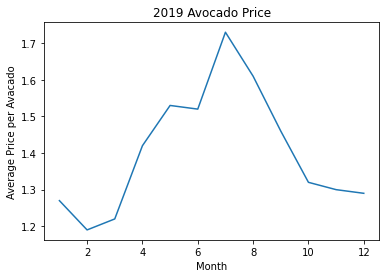

In [65]:
x_ax=month_price_avg2019.index.values
y_ax=month_price_avg2019["mean"]

plt.title("2019 Avocado Price")
plt.xlabel("Month")
plt.ylabel("Average Price per Avacado")
plt.plot(x_ax, y_ax)

plt.show

In [66]:
mergeall= pd.merge(merge2015, merge2016, how="outer", on="Month")
mergeall= pd.merge(mergeall, merge2017, how="outer", on="Month")
mergeall= pd.merge(mergeall, merge2018, how="outer", on="Month")
mergeall= pd.merge(mergeall, merge2019, how="outer", on="Month")
mergeall

,mean15,sum15,mean16,sum16,mean17,sum17,mean18,sum18,mean19,sum19
Month,,,,,,,,,,
1,1.37,318.0,1.24,475.0,1.28,533.0,1.37,534.0,1.27,503.0
2,1.33,363.0,1.24,429.0,1.21,472.0,1.32,498.0,1.19,534.0
3,1.36,419.0,1.22,391.0,1.40,359.0,1.34,455.0,1.22,634.0
4,1.38,344.0,1.21,402.0,1.50,490.0,1.32,602.0,1.42,465.0
5,1.34,484.0,1.20,561.0,1.53,426.0,1.28,552.0,1.53,467.0
6,1.40,382.0,1.28,410.0,1.55,410.0,1.31,494.0,1.52,553.0
7,1.41,357.0,1.40,467.0,1.56,475.0,1.34,599.0,1.73,390.0
8,1.44,419.0,1.41,371.0,1.70,338.0,1.42,433.0,1.61,411.0
9,1.45,329.0,1.43,362.0,1.84,285.0,1.48,501.0,1.46,534.0


In [67]:
mergeall.iloc[:,[0]].max()

mean15    1.45
dtype: float64

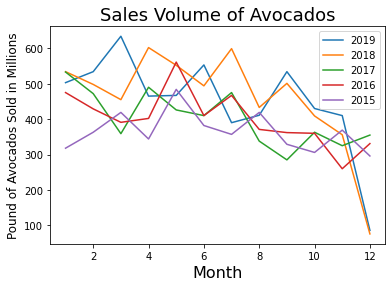

In [68]:
x19_ax=monthavoc2019_df.index.values
y19_ax=monthavoc2019_df["sum"]
x18_ax=monthavoc2018_df.index.values
y18_ax=monthavoc2018_df["sum"]
x17_ax=monthavoc2017_df.index.values
y17_ax=monthavoc2017_df["sum"]
x16_ax=monthavoc2016_df.index.values
y16_ax=monthavoc2016_df["sum"]
x15_ax=monthavoc2015_df.index.values
y15_ax=monthavoc2015_df["sum"]


plt.title("Sales Volume of Avocados", fontsize=18)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Pound of Avocados Sold in Millions", fontsize=12)
#plt.plot(x19_ax, y19_ax, x18_ax, y18_ax, x17_ax, y17_ax, x16_ax, y16_ax, x15_ax, y15_ax)
plt.plot(x19_ax, y19_ax, label="2019")
plt.plot(x18_ax, y18_ax, label="2018")
plt.plot(x17_ax, y17_ax, label="2017")
plt.plot(x16_ax, y16_ax, label="2016")
plt.plot(x15_ax, y15_ax, label="2015")
#fig.update_xaxes(nticks=12)
#plt.plot(figsize=(80,40))
plt.legend()
plt.show
plt.savefig('AvoSales.png')
#avocplot= monthavoc2019_df.plot(monthavoc2019_df['Month'], kind="line")
#avocplot

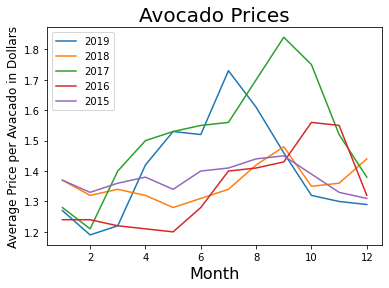

In [69]:
x19_ax=month_price_avg2019.index.values
y19_ax=month_price_avg2019["mean"]

x18_ax=month_price_avg2018.index.values
y18_ax=month_price_avg2018["mean"]

x17_ax=month_price_avg2017.index.values
y17_ax=month_price_avg2017["mean"]

x16_ax=month_price_avg2016.index.values
y16_ax=month_price_avg2016["mean"]

x15_ax=month_price_avg2015.index.values
y15_ax=month_price_avg2015["mean"]


plt.title("Avocado Prices", fontsize=20)
plt.xlabel("Month", fontsize=16)
plt.ylabel("Average Price per Avacado in Dollars", fontsize= 12)
plt.plot(x19_ax, y19_ax, label="2019")
plt.plot(x18_ax, y18_ax, label="2018")
plt.plot(x17_ax, y17_ax, label="2017")
plt.plot(x16_ax, y16_ax, label="2016")
plt.plot(x15_ax, y15_ax, label="2015")
plt.legend()
plt.show
plt.savefig('Avocado Prices')

In [70]:


# def millions(x, pos):
#     return '%1.1fM' % (x* 1e-6)
# formatter = FuncFormatter(millions)
# monthavoc2019_df.plot(kind="line")
# fig, ax = plt.subplots()
# ax.yaxis.set_major_formatter(formatter)
# #plt.title(avoc)
# plt.xlabel("month")
# plt.ylabel("volume")